In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

In [28]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   samplewise_center=True,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

train_set = train_datagen.flow_from_directory('train',
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary'
                                                 )

Found 2887 images belonging to 2 classes.


In [29]:
test_datagen = ImageDataGenerator(featurewise_center=True,
                                   samplewise_center=True,
                                   rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_set = test_datagen.flow_from_directory('test',
                                                 target_size = (50, 50),
                                                 batch_size = 32,
                                                 class_mode = 'binary'
                                                 )

Found 300 images belonging to 2 classes.


In [30]:
model = Sequential()

# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (50, 50, 3), activation = 'relu'))
# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second convolutional layer
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [31]:
history = model.fit_generator(train_set,
                         epochs = 5,
                         validation_data=test_set,
                         )

C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
91/91 [==============================] - 11s 120ms/step - loss: 0.2781 - accuracy: 0.8805 - val_loss: 0.1257 - val_accuracy: 0.9467
Epoch 2/5
91/91 [==============================] - 10s 111ms/step - loss: 0.0889 - accuracy: 0.9709 - val_loss: 0.0646 - val_accuracy: 0.9733
Epoch 3/5
91/91 [==============================] - 10s 113ms/step - loss: 0.0659 - accuracy: 0.9754 - val_loss: 0.0273 - val_accuracy: 1.0000
Epoch 4/5
91/91 [==============================] - 10s 112ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0175 - val_accuracy: 0.9967
Epoch 5/5
91/91 [==============================] - 10s 114ms/step - loss: 0.0104 - accuracy: 0.9965 - val_loss: 0.0107 - val_accuracy: 0.9967


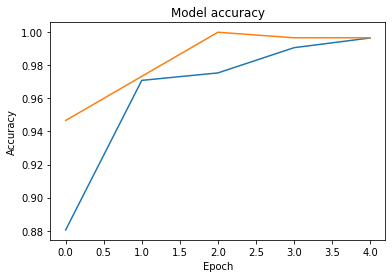

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.savefig('Model Accuracy')
plt.show()

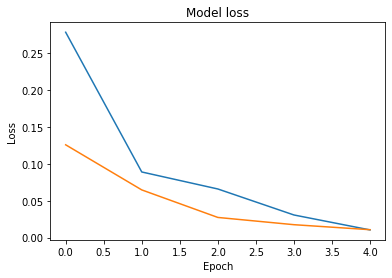

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.savefig('Model Loss')
plt.show()

In [34]:
model.save('garbage_recognition.h5')